In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
df = pd.read_csv(r"C:\Users\PC\Downloads\salary_prediction_data.csv")

In [9]:
print("First 5 rows:\n", df.head())
print("\nData Info:\n")
df.info()
print("\nSummary Statistics:\n", df.describe())


First 5 rows:
      Education  Experience  Location Job_Title  Age  Gender         Salary
0  High School           8     Urban   Manager   63    Male   84620.053665
1          PhD          11  Suburban  Director   59    Male  142591.255894
2     Bachelor          28  Suburban   Manager   61  Female   97800.255404
3  High School          29     Rural  Director   45    Male   96834.671282
4          PhD          25     Urban   Analyst   26  Female  132157.786175

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory u

In [10]:
#Data Cleaning
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)  # Drop rows with missing values

In [11]:
# Remove extra spaces
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


C:\Users\PC\AppData\Local\Temp\ipykernel_18252\2154910605.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [12]:
#Encoding Categorical Variables
categorical_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [13]:
#Features and Target
X = df.drop('Salary', axis=1)
y = df['Salary']

In [14]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
#Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [16]:
#Make Predictions
y_pred_rf = rf.predict(X_test)

In [17]:
#Evaluation
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
print("\n📈 Evaluation Metrics:")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


📈 Evaluation Metrics:
Mean Squared Error: 127133424.80801472
R2 Score: 0.8442997059269723


In [18]:
#Show Predictions
comparison = pd.DataFrame({
    'Actual Salary': y_test.values,
    'Predicted Salary (RF)': y_pred_rf
})
comparison.reset_index(drop=True, inplace=True)
print("\nFirst 20 Predictions:\n", comparison.head(20))



First 20 Predictions:
     Actual Salary  Predicted Salary (RF)
0    86677.840109           79724.970542
1    56036.163010           60987.630871
2    92226.871819          101281.660589
3   100710.088052           98899.265557
4    91775.012832           98458.318915
5    52282.492625           64952.363464
6   102139.813085           82824.839870
7   127491.152115          114736.746308
8   117342.186715          124073.399012
9    99647.042817          105672.031477
10  166637.425928          155350.227293
11  169510.253042          161881.899021
12  100903.098073          119411.671085
13   95395.502060           93097.322912
14   94613.537563           96992.353236
15  102512.100079           91205.606255
16  124794.746532          132826.664211
17   92373.801934           92776.811328
18  112114.271263           95830.649180
19   98194.014838           97427.531737


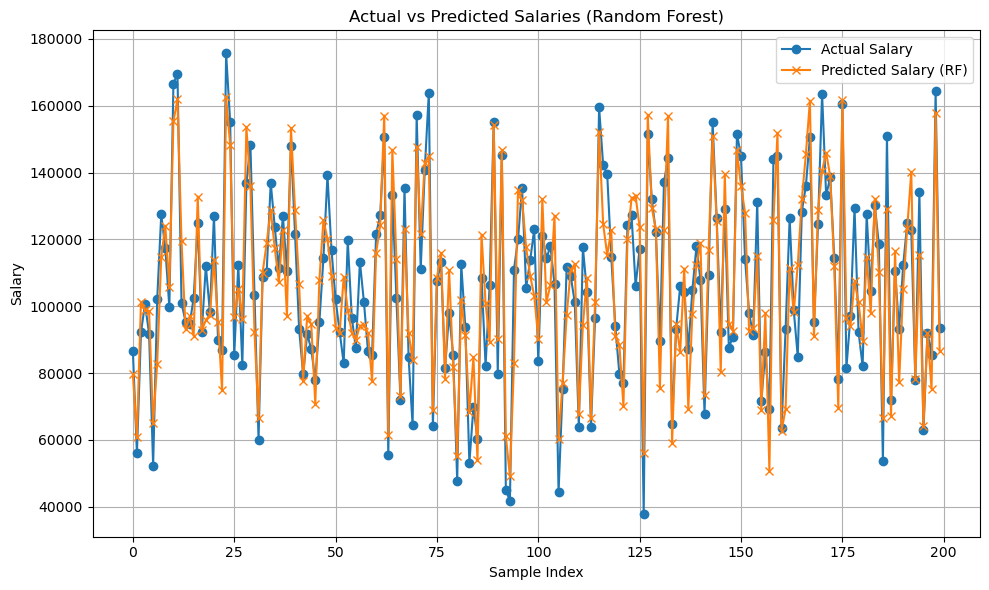

In [19]:
#Line Plot - Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Salary', marker='o')
plt.plot(y_pred_rf, label='Predicted Salary (RF)', marker='x')
plt.title('Actual vs Predicted Salaries (Random Forest)')
plt.xlabel('Sample Index')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

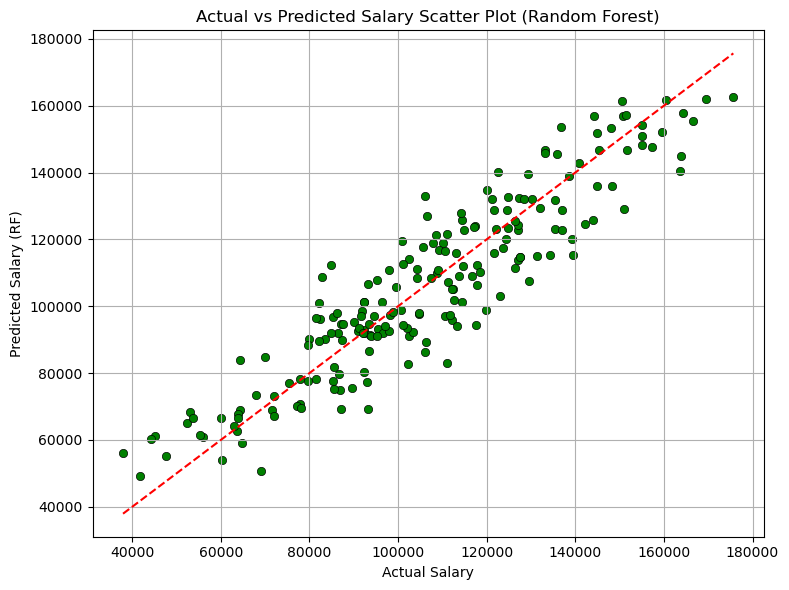

In [20]:
#Scatter Plot - Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='green', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary (RF)')
plt.title('Actual vs Predicted Salary Scatter Plot (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()